# Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# For using GPU
if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")
        
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=5048)]
            )
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

# Common imports
import numpy as np
import os
import pandas as pd
import cv2
import sklearn.model_selection
import urllib

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

C:\Users\TJuric\AppData\Local\Programs\Python\Python37\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.3) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


1 Physical GPUs, 1 Logical GPUs


# Creating train & test set

In [2]:
df = pd.read_csv("data.csv",header=None)
df.columns = ["image_name","x_min","y_min","x_max","y_max","class_name"]
df.head(10)

,image_name,x_min,y_min,x_max,y_max,class_name
0,FilteredData\Ahmed_Chalabi_0002.jpg,141,102,167,128,eye
1,FilteredData\Ahmed_Chalabi_0002.jpg,100,105,128,133,eye
2,FilteredData\Jules_Asner_0001.jpg,92,100,114,122,eye
3,FilteredData\Jules_Asner_0001.jpg,137,103,163,129,eye
4,FilteredData\Valentino_Rossi_0004.jpg,86,85,116,115,eye
5,FilteredData\Valentino_Rossi_0004.jpg,139,88,169,118,eye
6,FilteredData\Eric_Vigouroux_0001.jpg,92,104,118,130,eye
7,FilteredData\Eric_Vigouroux_0001.jpg,133,105,158,130,eye
8,FilteredData\Erika_Harold_0001.jpg,129,97,157,125,eye
9,FilteredData\Erika_Harold_0001.jpg,86,103,111,128,eye


In [3]:
images = df['image_name'].unique()

train, test = sklearn.model_selection.train_test_split(images,test_size=0.2,train_size=0.8,random_state=42)
print(f"Train length = {len(train)}\nTest length = {len(test)} ")

Train length = 364
Test length = 92 


In [4]:
df_train = pd.DataFrame(columns=["image_name","x_min","y_min","x_max","y_max","class_name"])

for path in train:
    df_train = df_train.append(df.loc[df["image_name"]==path])

if not os.path.exists("train.csv"):
    df_train.to_csv("train.csv",sep=",",header=False,index=False)
else:
    print("File already exists, new one not created")

df_train

File already exists, new one not created


,image_name,x_min,y_min,x_max,y_max,class_name
34,FilteredData\Ari_Fleischer_0003.jpg,127,95,157,125,eye
35,FilteredData\Ari_Fleischer_0003.jpg,87,101,112,126,eye
135,FilteredData\Thomas_Stewart_0001.jpg,93,101,117,125,eye
136,FilteredData\Thomas_Stewart_0001.jpg,135,96,164,125,eye
624,FilteredData\Sue_Slavec_0001.jpg,86,100,112,126,eye
...,...,...,...,...,...,...
712,FilteredData\Fatma_Kusibeh_0001.jpg,93,101,116,124,eye
887,FilteredData\Oxana_Fedorova_0002.jpg,140,98,162,120,eye
888,FilteredData\Oxana_Fedorova_0002.jpg,101,103,127,129,eye
209,FilteredData\Donald_Rumsfeld_0038.jpg,124,98,149,123,eye


In [5]:
df_test = pd.DataFrame(columns=["image_name","x_min","y_min","x_max","y_max","class_name"])

for path in test:
    df_test = df_test.append(df.loc[df["image_name"]==path])

if not os.path.exists("test.csv"):
    df_test.to_csv("test.csv",sep=",",header=False,index=False)
else:
    print("File already exists, new one not created")

df_test

File already exists, new one not created


,image_name,x_min,y_min,x_max,y_max,class_name
762,FilteredData\Lance_Bass_0004.jpg,137,99,164,126,eye
763,FilteredData\Lance_Bass_0004.jpg,96,96,129,129,eye
81,FilteredData\Philippe_Noiret_0002.jpg,103,84,127,108,eye
82,FilteredData\Philippe_Noiret_0002.jpg,142,83,175,116,eye
696,FilteredData\George_W_Bush_0415.jpg,131,101,156,126,eye
...,...,...,...,...,...,...
118,FilteredData\Raghad_Saddam_Hussein_0001.jpg,121,103,153,135,eye
315,FilteredData\Nestor_Kirchner_0033.jpg,88,96,120,128,eye
316,FilteredData\Nestor_Kirchner_0033.jpg,134,93,164,123,eye
48,FilteredData\Steve_Nash_0001.jpg,139,100,162,123,eye


# Downloading RetinaNet

In [6]:
!git clone https://github.com/fizyr/keras-retinanet.git

fatal: destination path 'keras-retinanet' already exists and is not an empty directory.


In [7]:
# Installing the model

%cd keras-retinanet

!pip install .

D:\Program Files (x86)\learningPython3\learningPython3\MachineLearning\EyeDetection2\keras-retinanet
Processing d:\program files (x86)\learningpython3\learningpython3\machinelearning\eyedetection2\keras-retinanet
  Created wheel for keras-retinanet: filename=keras_retinanet-1.0.0-cp37-cp37m-win_amd64.whl size=129980 sha256=1356244df2b700d19f03c44e8bfb11c68a9748e3a983c6a32621168245ed5633
  Stored in directory: c:\users\tjuric\appdata\local\pip\cache\wheels\82\fe\8b\a96e3c9068256c824eba9e3e3eebb0b2e788d925545fd146bc
Successfully built keras-retinanet
  Attempting uninstall: keras-retinanet
    Found existing installation: keras-retinanet 1.0.0
    Uninstalling keras-retinanet-1.0.0:
      Successfully uninstalled keras-retinanet-1.0.0


You should consider upgrading via the 'c:\users\tjuric\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [8]:
!python setup.py build_ext --inplace

running build_ext
skipping 'keras_retinanet/utils\compute_overlap.c' Cython extension (up-to-date)
copying build\lib.win-amd64-3.7\keras_retinanet\utils\compute_overlap.cp37-win_amd64.pyd -> keras_retinanet\utils


In [9]:
%cd ..

D:\Program Files (x86)\learningPython3\learningPython3\MachineLearning\EyeDetection2


In [10]:
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption,draw_boxes
from keras_retinanet.utils.colors import label_color

# Loading the model

In [11]:
MODEL_URL = 'https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5'

PRETRAINED_MODEL_PATH = os.path.join("keras-retinanet","snapshots","resnet50_coco_best_v2.1.0.h5")

if os.path.exists(PRETRAINED_MODEL_PATH):
    print("Model already downloaded!")
else:
    urllib.request.urlretrieve(MODEL_URL, PRETRAINED_MODEL_PATH)
    
model = models.load_model(PRETRAINED_MODEL_PATH, backbone_name="resnet50")

Model already downloaded!


# Training the model

In [13]:
%run keras-retinanet/keras_retinanet/bin/train.py \
    --freeze-backbone \
    --random-transform \
    --weights {PRETRAINED_MODEL_PATH} \
    --batch-size 1 \
    --steps 364 \
    --epochs 10 \
    --compute-val-loss \
    --tensorboard-dir ./TrainingOutput \
    csv train.csv classes.csv \
    --val-annotations test.csv

Creating model, this may take a second...
Model: "retinanet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9408        input_1[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________________
conv1_relu (Activation)         (None, None, None, 6 0           bn_conv1[0][0]                   
________________________________________________

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
  1/364 [..............................] - ETA: 0s - loss: 3.8765 - regression_loss: 2.7568 - classification_loss: 1.1196WARNING:tensorflow:From C:\Users\TJuric\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
364/364 [==============================] - ETA: 0s - loss: 1.7389 - regression_loss: 1.2972 - classification_loss: 0.4417WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0100s vs `on_test_batch_end` time: 0.0730s). Check your callbacks.


Running network: 100% (92 of 92) |#######| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (92 of 92) |###| Elapsed Time: 0:00:00 Time:  0:00:00


188 instances of class eye with average precision: 0.9614
mAP: 0.9614

Epoch 00001: saving model to ./snapshots\resnet50_csv_01.h5
364/364 [==============================] - 79s 216ms/step - loss: 1.7389 - regression_loss: 1.2972 - classification_loss: 0.4417 - val_loss: 1.1783 - val_regression_loss: 0.9809 - val_classification_loss: 0.1975
Epoch 2/10
364/364 [==============================] - ETA: 0s - loss: 1.1221 - regression_loss: 0.9582 - classification_loss: 0.1639

Running network: 100% (92 of 92) |#######| Elapsed Time: 0:00:09 Time:  0:00:09
Parsing annotations: 100% (92 of 92) |###| Elapsed Time: 0:00:00 Time:  0:00:00


188 instances of class eye with average precision: 0.9677
mAP: 0.9677

Epoch 00002: saving model to ./snapshots\resnet50_csv_02.h5
364/364 [==============================] - 76s 209ms/step - loss: 1.1221 - regression_loss: 0.9582 - classification_loss: 0.1639 - val_loss: 1.0050 - val_regression_loss: 0.8407 - val_classification_loss: 0.1642
Epoch 3/10
364/364 [==============================] - ETA: 0s - loss: 1.0658 - regression_loss: 0.9100 - classification_loss: 0.1558

Running network: 100% (92 of 92) |#######| Elapsed Time: 0:00:09 Time:  0:00:09
Parsing annotations: 100% (92 of 92) |###| Elapsed Time: 0:00:00 Time:  0:00:00


188 instances of class eye with average precision: 0.9715
mAP: 0.9715

Epoch 00003: saving model to ./snapshots\resnet50_csv_03.h5
364/364 [==============================] - 76s 210ms/step - loss: 1.0658 - regression_loss: 0.9100 - classification_loss: 0.1558 - val_loss: 0.9613 - val_regression_loss: 0.8166 - val_classification_loss: 0.1447
Epoch 4/10
364/364 [==============================] - ETA: 0s - loss: 1.0043 - regression_loss: 0.8665 - classification_loss: 0.1378

Running network: 100% (92 of 92) |#######| Elapsed Time: 0:00:09 Time:  0:00:09
Parsing annotations: 100% (92 of 92) |###| Elapsed Time: 0:00:00 Time:  0:00:00


188 instances of class eye with average precision: 0.9760
mAP: 0.9760

Epoch 00004: saving model to ./snapshots\resnet50_csv_04.h5
364/364 [==============================] - 77s 211ms/step - loss: 1.0043 - regression_loss: 0.8665 - classification_loss: 0.1378 - val_loss: 0.9746 - val_regression_loss: 0.8366 - val_classification_loss: 0.1380
Epoch 5/10
364/364 [==============================] - ETA: 0s - loss: 0.9691 - regression_loss: 0.8433 - classification_loss: 0.1258

Running network: 100% (92 of 92) |#######| Elapsed Time: 0:00:09 Time:  0:00:09
Parsing annotations: 100% (92 of 92) |###| Elapsed Time: 0:00:00 Time:  0:00:00


188 instances of class eye with average precision: 0.9771
mAP: 0.9771

Epoch 00005: saving model to ./snapshots\resnet50_csv_05.h5
364/364 [==============================] - 77s 211ms/step - loss: 0.9691 - regression_loss: 0.8433 - classification_loss: 0.1258 - val_loss: 0.9674 - val_regression_loss: 0.8251 - val_classification_loss: 0.1423
Epoch 6/10
364/364 [==============================] - ETA: 0s - loss: 0.9586 - regression_loss: 0.8321 - classification_loss: 0.1264

Running network: 100% (92 of 92) |#######| Elapsed Time: 0:00:09 Time:  0:00:09
Parsing annotations: 100% (92 of 92) |###| Elapsed Time: 0:00:00 Time:  0:00:00


188 instances of class eye with average precision: 0.9754
mAP: 0.9754

Epoch 00006: saving model to ./snapshots\resnet50_csv_06.h5
364/364 [==============================] - 77s 211ms/step - loss: 0.9586 - regression_loss: 0.8321 - classification_loss: 0.1264 - val_loss: 0.9235 - val_regression_loss: 0.7876 - val_classification_loss: 0.1360
Epoch 7/10
364/364 [==============================] - ETA: 0s - loss: 0.9479 - regression_loss: 0.8244 - classification_loss: 0.1236

Running network: 100% (92 of 92) |#######| Elapsed Time: 0:00:09 Time:  0:00:09
Parsing annotations: 100% (92 of 92) |###| Elapsed Time: 0:00:00 Time:  0:00:00


188 instances of class eye with average precision: 0.9739
mAP: 0.9739

Epoch 00007: saving model to ./snapshots\resnet50_csv_07.h5
364/364 [==============================] - 77s 212ms/step - loss: 0.9479 - regression_loss: 0.8244 - classification_loss: 0.1236 - val_loss: 0.9203 - val_regression_loss: 0.7904 - val_classification_loss: 0.1299
Epoch 8/10
364/364 [==============================] - ETA: 0s - loss: 0.9350 - regression_loss: 0.8087 - classification_loss: 0.1263

Running network: 100% (92 of 92) |#######| Elapsed Time: 0:00:09 Time:  0:00:09
Parsing annotations: 100% (92 of 92) |###| Elapsed Time: 0:00:00 Time:  0:00:00


188 instances of class eye with average precision: 0.9760
mAP: 0.9760

Epoch 00008: saving model to ./snapshots\resnet50_csv_08.h5
364/364 [==============================] - 77s 212ms/step - loss: 0.9350 - regression_loss: 0.8087 - classification_loss: 0.1263 - val_loss: 0.8877 - val_regression_loss: 0.7628 - val_classification_loss: 0.1249


In [12]:
# %load_ext tensorboard
# %tensorboard --logdir=./TrainingOutput --port=6006

. | .
- | -
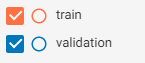 | 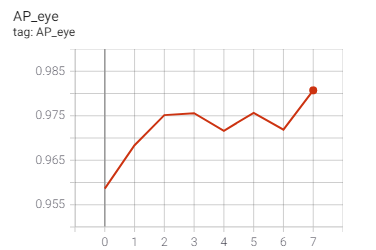
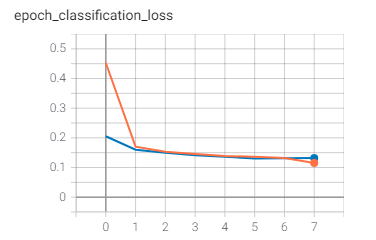 | 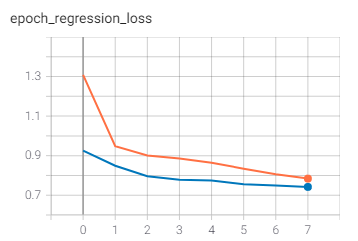

# Loading the trained model

In [14]:
model_path = os.path.join("snapshots",sorted(os.listdir('snapshots'), reverse=True)[0])

model = models.load_model(model_path,backbone_name="resnet50")
model = models.convert_model(model) #Converts a training model to an inference model.

In [15]:
def predict(image):
    image = preprocess_image(image.copy())
    image, scale = resize_image(image)
    boxes, scores, labels = model.predict_on_batch(
        np.expand_dims(image, axis=0)
    )
    boxes /= scale
    return boxes, scores, labels

In [16]:
labels_to_names = pd.read_csv(
  "classes.csv",
  header=None
).T.loc[0].to_dict()

In [17]:
THRES_SCORE = 0.5
def draw_detections(image, boxes, scores, labels):
      for box, score, label in zip(boxes[0], scores[0], labels[0]):
            if score < THRES_SCORE:
                break
            color = label_color(label)
            b = box.astype(int)
            draw_box(image, b, color=color,thickness=1)
            #caption = "{} {:.3f}".format(labels_to_names[label], score)
            caption = "{:.2f}".format(score)
            draw_caption(image, b, caption)

In [18]:
def show_detected_objects(image_row,df):
    img_path = image_row.image_name
    image = read_image_bgr(img_path)
    boxes, scores, labels = predict(image)
    draw = image.copy()
    draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

    df_rows = df.loc[df["image_name"]==img_path]

    label_boxes = []
    for index, row in df_rows.iterrows():
        label_boxes.append([row["x_min"],row["y_min"],row["x_max"],row["y_max"]])

    #true_box = [
    #image_row.x_min, image_row.y_min, image_row.x_max, image_row.y_max
    #]
    #draw_box(draw, true_box, color=(255, 255, 0))

    draw_boxes(draw,label_boxes,color=(255,255,0))

    draw_detections(draw, boxes, scores, labels)
    plt.axis('off')
    plt.imshow(draw)
    plt.show()

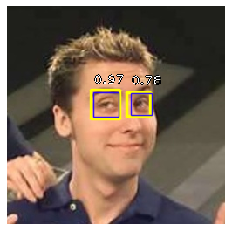

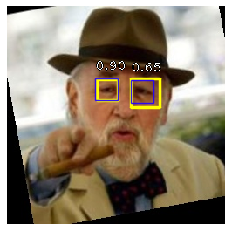

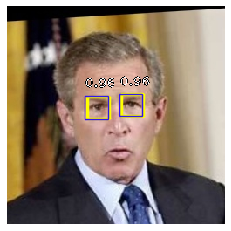

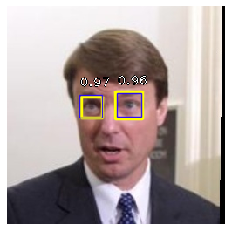

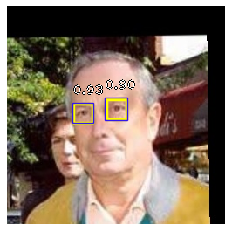

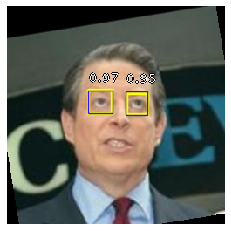

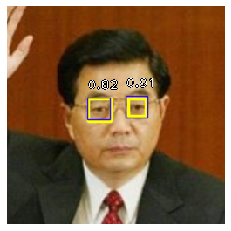

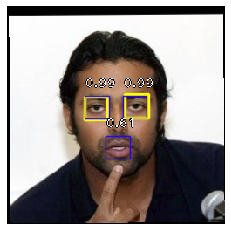

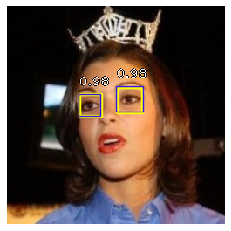

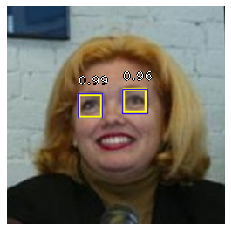

In [25]:
for x in range(0,20,2):
    show_detected_objects(df_test.iloc[x],df_test)

# Testing on mask images

In [20]:
def make_predictions(image_path):
    image = cv2.imread(image_path)
    
    boxes, scores, labels = predict(image)

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    draw_detections(image, boxes, scores, labels)

    plt.imshow(image)
    plt.show()
    

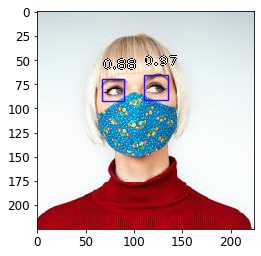

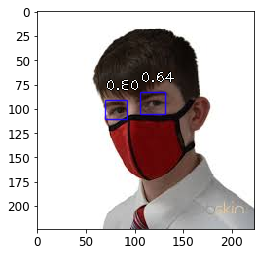

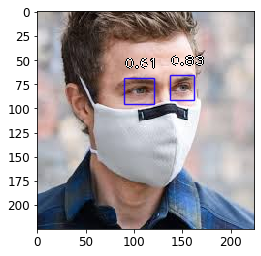

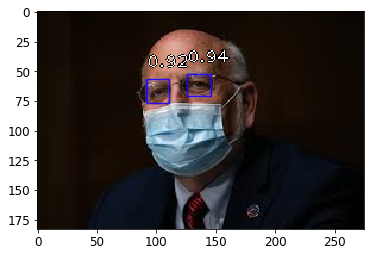

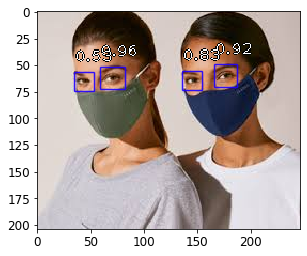

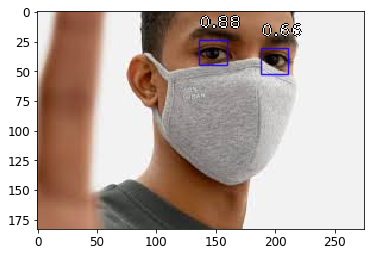

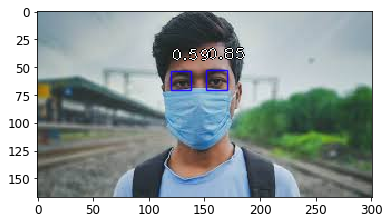

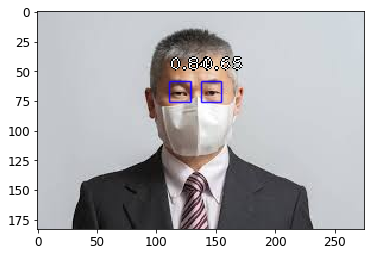

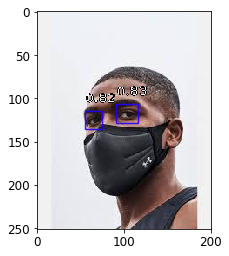

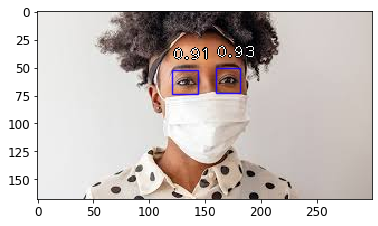

In [21]:
images = list(map(lambda x: "./mask_images/"+x, os.listdir("mask_images")))

for image_path in images:
    make_predictions(image_path)